In [1]:
#Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [62]:
#Levantamos el df_final2
df_final2 = pd.read_csv('df_final2.csv')

#Generamos el X y el target
X = df_final2.drop(['target'], axis = 1)
y = df_final2['target']

#Divimos en train y en test
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size= 0.25)

#Estandarizamos con MinMax
scaler = MinMaxScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

In [63]:
# Buscamos los mejores hiperparametros

#model = LogisticRegression()
#solvers = ['newton-cg', 'lbfgs', 'liblinear']
#penalty = ['l2']
#c_values = [100, 10, 1.0, 0.1, 0.01]

# Defnimos una grilla con GridSearch

#grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)
#grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
#grid_result = grid_search.fit(X_train_std, y_train)

# Vemos los resultados

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

In [64]:
#Instanciamos el modelo y los ajustamos a los datos de entrenamiento
model = LogisticRegression(C=10, penalty = 'l2', solver= 'liblinear')
model.fit(X_train_std, y_train)

LogisticRegression(C=10, solver='liblinear')

In [65]:
#Para UN solo fold
#Hacemos las predicciones necesarias
y_pred = model.predict(X_test_std)
print(y_pred)
#Evaluamos el score
print('')
print('Score: ', accuracy_score(y_test, y_pred))

[22. 22. 22. 33. 22. 21. 21. 21. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 21. 32. 22. 22. 22. 22. 22. 22. 22. 32. 22.
 22. 22. 21. 21. 22. 22. 22. 21. 22. 22. 21. 22. 22. 22. 22. 31. 22. 22.
 22. 22. 22. 22. 22. 22. 32. 22. 22. 22. 22. 21. 22. 21. 22. 22. 22. 22.
 21. 22. 22. 21. 21. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 21. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 21. 32. 21. 22. 21. 22. 22. 22. 22.
 21. 22. 22. 22. 21. 22. 22. 22. 22. 21. 22. 22. 22. 22. 32. 22. 22. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 22. 22. 21. 22. 22. 22. 22. 22. 21. 21.
 21. 22. 22. 21. 22. 22. 22. 22. 32. 22. 22. 21. 22. 22. 22. 21. 21. 21.
 22. 21. 22. 22. 22. 22. 22. 21. 21. 22. 32. 21. 22. 22. 22. 22. 21. 22.
 22. 22. 32. 22. 22. 22. 22. 22. 22. 22. 21. 21. 22. 32. 22. 22. 21. 22.]

Score:  0.4595959595959596


In [66]:
#Generalizamos para 20 folds
stratifiedkf=StratifiedKFold(n_splits=20)
score=cross_val_score(model,X_train_std,y_train,cv=stratifiedkf)
print("Los scores obtenidos son {}".format(score))
print("El promedio es :{}".format(score.mean()))

C:\Users\DataScience\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=20.
  warnings.warn(


Los scores obtenidos son [0.43333333 0.33333333 0.4        0.4        0.46666667 0.3
 0.5        0.33333333 0.36666667 0.43333333 0.36666667 0.46666667
 0.43333333 0.4137931  0.48275862 0.37931034 0.4137931  0.4137931
 0.51724138 0.5862069 ]
El promedio es :0.42201149425287354


In [67]:
model.coef_

array([[ 1.73638956,  1.38445619,  0.97012795, -0.52076142, -1.96065443,
        -0.42901445, -1.2079663 , -1.8241272 ,  0.84699549, -1.73456135,
         1.09784693,  0.14670172, -0.89761015,  1.69477812,  1.3102586 ,
         1.04210033,  0.19005314, -0.12156141, -0.22233599,  1.30724345,
        -2.08828409,  1.11929633, -1.41769792,  0.27814051,  0.15373989,
        -2.35115373, -0.07156029, -0.83876326, -2.54509877, -0.39563604,
        -0.16893956, -1.53653045],
       [ 0.15779509,  1.01160523, -0.35656941, -2.58948196, -0.55941311,
        -0.53575304,  2.31088366,  2.36749323, -2.49074399, -0.06676836,
         0.28544964, -0.11665906,  0.556709  , -0.83411735,  1.87229545,
        -0.6692475 ,  1.06555995, -1.1601636 , -1.43664117,  1.25803436,
         0.01792243,  0.89767746, -0.0741532 , -0.79504374,  0.65014594,
        -0.16013316, -1.47714204,  0.1071627 , -0.26076326, -0.99063344,
        -1.92665309, -1.15507299],
       [-1.09430379, -0.01885317,  0.39506136,  2.2045

In [22]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Oranges',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [69]:
cf_matrix = confusion_matrix(y_test, y_pred)

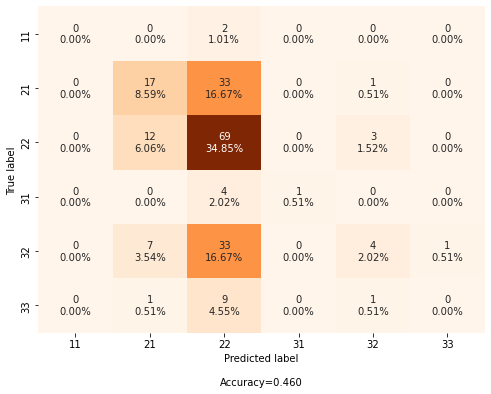

In [70]:
make_confusion_matrix(cf_matrix, categories= [11,21,22,31,32,33] , figsize=(8,6), cbar=False)

In [71]:
################################################################################################################################

In [15]:
#Hagamos regresion logística con el data set alternativo

#Levantamos el df_final_alternativo
df_final_alternativo = pd.read_csv('df_final_alternativo.csv')

#Generamos el X y el target
Xa = df_final_alternativo.drop(['ClasificacionNum2'], axis = 1)
ya = df_final_alternativo['ClasificacionNum2']

#Divimos en train y en test
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, stratify=ya, test_size= 0.25)

#Estandarizamos con MinMax
scaler = MinMaxScaler()

Xa_train_std = scaler.fit_transform(Xa_train)
Xa_test_std = scaler.fit_transform(Xa_test)

In [4]:
# Buscamos los mejores hiperparametros

modelo = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Defnimos una grilla con GridSearch

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=999)
grid_search = GridSearchCV(estimator=modelo, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xa_train_std, ya_train)

# Vemos los resultados

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.765996 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.762625 (0.068897) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.760900 (0.067962) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.762625 (0.067813) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.760900 (0.068291) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.760900 (0.068291) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.764253 (0.067028) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.765996 (0.062456) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.765996 (0.062456) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.753487 (0.065581) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.754464 (0.055602) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.754464 (0.055602) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.754981 (0.058400) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.689330 (0.010568) wit

In [5]:
#Instanciamos el modelo y los ajustamos a los datos de entrenamiento
modelo = LogisticRegression(C=1, penalty = 'l2', solver= 'newton-cg')
modelo.fit(Xa_train_std, ya_train)

LogisticRegression(C=1, solver='newton-cg')

In [16]:
#Para UN solo fold
#Hacemos las predicciones necesarias
ya_pred = modelo.predict(Xa_test_std)
print(ya_pred)
#Evaluamos el score
print('')
print('Score: ', accuracy_score(ya_test, ya_pred))

[1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0]

Score:  0.7908163265306123


In [18]:
#Generalizamos para 20 folds
stratifiedkf=StratifiedKFold(n_splits=20)
score=cross_val_score(modelo,Xa_train_std,ya_train,cv=stratifiedkf)
print("Los scores obtenidos son {}".format(score))
print("El promedio es :{}".format(score.mean()))

Los scores obtenidos son [0.86666667 0.8        0.83333333 0.83333333 0.7        0.83333333
 0.76666667 0.76666667 0.72413793 0.68965517 0.65517241 0.65517241
 0.79310345 0.75862069 0.65517241 0.79310345 0.82758621 0.65517241
 0.79310345 0.72413793]
El promedio es :0.756206896551724


In [20]:
cf_matrix_a = confusion_matrix(ya_pred,ya_test)

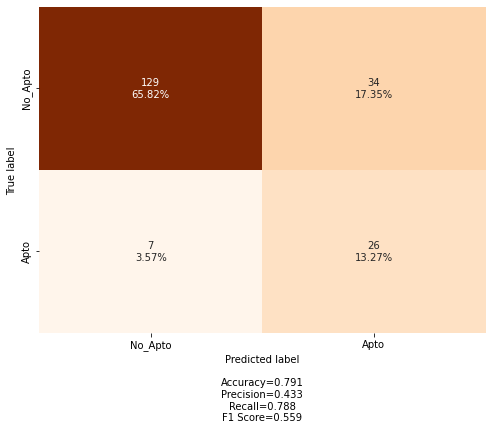

In [23]:
make_confusion_matrix(cf_matrix_a, categories= ['No_Apto', 'Apto'] , figsize=(8,6), cbar=False)

In [24]:
y_pred_proba = modelo.predict_proba(Xa_test_std)

In [25]:
display(y_pred_proba.shape, y_pred_proba)

(196, 2)

array([[0.42715847, 0.57284153],
       [0.71863308, 0.28136692],
       [0.75590416, 0.24409584],
       [0.7176917 , 0.2823083 ],
       [0.6812731 , 0.3187269 ],
       [0.26398673, 0.73601327],
       [0.94098441, 0.05901559],
       [0.8614691 , 0.1385309 ],
       [0.56021273, 0.43978727],
       [0.96971404, 0.03028596],
       [0.60958408, 0.39041592],
       [0.89711217, 0.10288783],
       [0.6426534 , 0.3573466 ],
       [0.48319563, 0.51680437],
       [0.8104012 , 0.1895988 ],
       [0.5759396 , 0.4240604 ],
       [0.83554206, 0.16445794],
       [0.71261524, 0.28738476],
       [0.87913632, 0.12086368],
       [0.95760796, 0.04239204],
       [0.68282492, 0.31717508],
       [0.68819736, 0.31180264],
       [0.62540987, 0.37459013],
       [0.55889319, 0.44110681],
       [0.88223992, 0.11776008],
       [0.67138113, 0.32861887],
       [0.51756261, 0.48243739],
       [0.53432944, 0.46567056],
       [0.95338574, 0.04661426],
       [0.58659137, 0.41340863],
       [0.

In [37]:
# Pertenencia a partir de las probabilidades
pd.Series(y_pred_proba[:,1]>0.4).astype(int).value_counts()
#0 no apto, 1 apto

0    139
1     57
dtype: int64

In [38]:
# Pertenencia calculada a partir del método .predict()
pd.Series(ya_pred).value_counts()

0    163
1     33
dtype: int64

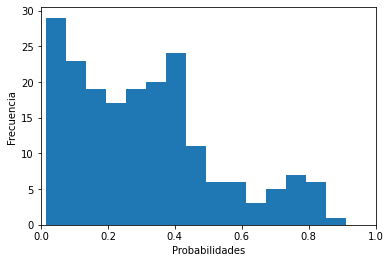

In [30]:
# Nos quedamos con la columna que tiene la probabilidad positiva de cada caso
y_probs_logit_left = y_pred_proba[:,1]

# Generamos un histograma de esa columna
plt.hist(y_probs_logit_left, bins=15)
plt.xlim(0,1)
plt.xlabel('Probabilidades')
plt.ylabel('Frecuencia')
plt.show()

In [150]:
#Cambiamos el umbral a 0.4
ya_pred_logit = (y_probs_logit_left > 0.25).astype(int)
cf_matrix_a_logit = confusion_matrix(ya_pred_logit,ya_test)

In [151]:
ya_pred_logit

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0])

In [152]:
print('Matrix Original')
display(confusion_matrix(ya_pred,ya_test))
print('')
print('Nueva Matrix')
display(confusion_matrix(ya_pred_logit,ya_test))

Matrix Original


array([[129,  34],
       [  7,  26]], dtype=int64)


Nueva Matrix


array([[81,  7],
       [55, 53]], dtype=int64)

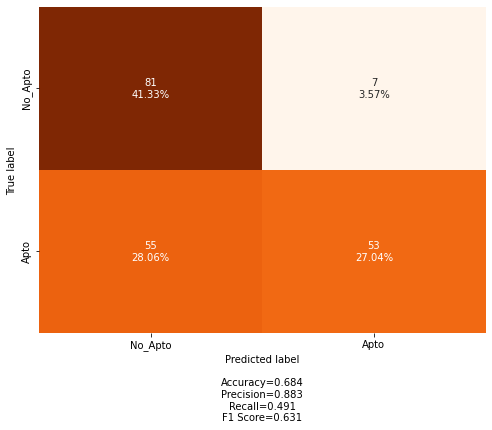

In [153]:
make_confusion_matrix(cf_matrix_a_logit, categories= ['No_Apto','Apto'] , figsize=(8,6), cbar=False)

In [154]:
modelo.coef_

array([[-0.10062225,  3.27754255, -0.16244488,  0.09041464, -0.01650085,
        -0.33139506,  0.61462007,  0.00690604,  0.00519458,  0.53688738,
        -0.51710485,  0.73376939,  0.62546135, -0.4804606 , -0.25917798,
        -0.52467601,  0.05906408,  0.19271361,  0.52656016,  0.06704814,
        -1.10836868,  0.22011981,  0.32641581,  0.25633861, -0.30240474,
        -0.90478186,  0.22051043,  0.07917532,  0.60509557, -0.12190474,
        -0.37416073,  0.14505331,  0.56298231]])

In [155]:
from sklearn.metrics import roc_curve
fpr_log,tpr_log,thr_log = roc_curve(ya_test, y_pred_proba[:,1])

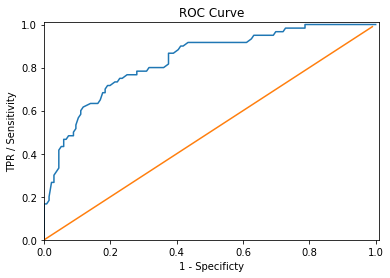

In [156]:
df = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [157]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_log, tpr_log))

AUC= 0.8342524509803921
